# Multivariate modelling

In [82]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
from pygam import GAM, LinearGAM, s, l
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from PIL import Image as im

## 6. Modelling NDVI_100

In [40]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_100_df.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,Grass%_100,Shrubs%_100,geometry
0,0.536433,0.414039,0.201814,0.097506,0.106576,POINT (377971.171 402346.176)
1,0.571965,0.551457,0.108844,0.072562,0.340136,POINT (364310.461 403435.100)
2,0.455587,0.256395,0.129252,0.092971,0.043084,POINT (369566.841 406840.228)
3,0.816160,0.942891,0.009070,0.249433,0.068027,POINT (354567.818 412168.416)
4,0.526997,0.388459,0.217687,0.061224,0.111111,POINT (388526.382 403175.927)


In [41]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Canopy%_100', 'Shrubs%_100', 'Grass%_100']
df = pd.DataFrame(gdf_100, columns=cols)

# target as NDVI_100
target = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# define X and Y
#X = df
y = target['NDVI_100']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 6.1. Model 1: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [44]:
# Model 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_1 = LinearGAM(l(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_1.gridsearch(X_train, y_train, lam=lams)
ndvi_100_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.9996
Link Function:                     IdentityLink Log Likelihood:                               -334730.1214
Number of Samples:                         4673 AIC:                                           669470.2421
                                                AICc:                                           669470.255
                                                GCV:                                                0.0066
                                                Scale:                                              0.0066
                                                Pseudo R-Squared:                                   0.6928
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/4165518819.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_1.summary()


### 6.2. Model 2: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [45]:
# Model 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_2 = LinearGAM(s(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_2.gridsearch(X_train, y_train, lam=lams)
ndvi_100_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.6945
Link Function:                     IdentityLink Log Likelihood:                               -375480.4636
Number of Samples:                         4673 AIC:                                           751002.3161
                                                AICc:                                          751002.5092
                                                GCV:                                                0.0059
                                                Scale:                                              0.0059
                                                Pseudo R-Squared:                                   0.7268
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2442450153.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_2.summary()


### 6.3. Model 3: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [46]:
# Model 3
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_3 = LinearGAM(l(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_3.gridsearch(X_train, y_train, lam=lams)
ndvi_100_3.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     21.9796
Link Function:                     IdentityLink Log Likelihood:                               -394042.6295
Number of Samples:                         4673 AIC:                                           788131.2183
                                                AICc:                                          788131.4554
                                                GCV:                                                0.0057
                                                Scale:                                              0.0056
                                                Pseudo R-Squared:                                   0.7394
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/4073591579.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_3.summary()


### 6.4. Model 4: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [47]:
# Model 4
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_4.gridsearch(X_train, y_train, lam=lams)
ndvi_100_4.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.6776
Link Function:                     IdentityLink Log Likelihood:                                -364393.798
Number of Samples:                         4673 AIC:                                           728828.9513
                                                AICc:                                           728829.144
                                                GCV:                                                0.0061
                                                Scale:                                              0.0061
                                                Pseudo R-Squared:                                   0.7188
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/3955161003.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_4.summary()


### 6.5. Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [48]:
# Model 5
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_5 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_5.gridsearch(X_train, y_train, lam=lams)
ndvi_100_5.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     37.6532
Link Function:                     IdentityLink Log Likelihood:                               -404805.7086
Number of Samples:                         4673 AIC:                                           809688.7235
                                                AICc:                                          809689.3851
                                                GCV:                                                0.0055
                                                Scale:                                              0.0055
                                                Pseudo R-Squared:                                   0.7478
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/979852687.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_5.summary()


### 6.6. Model 6: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [49]:
# Model 6
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_6 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_6.gridsearch(X_train, y_train, lam=lams)
ndvi_100_6.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     35.3582
Link Function:                     IdentityLink Log Likelihood:                               -389184.4997
Number of Samples:                         4673 AIC:                                           778441.7158
                                                AICc:                                          778442.3018
                                                GCV:                                                0.0057
                                                Scale:                                              0.0057
                                                Pseudo R-Squared:                                   0.7378
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/1329383776.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_6.summary()


### 6.7. Model 7: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [50]:
# Model 7
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_7 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_7.gridsearch(X_train, y_train, lam=lams)
ndvi_100_7.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      24.333
Link Function:                     IdentityLink Log Likelihood:                               -395120.5145
Number of Samples:                         4673 AIC:                                            790291.695
                                                AICc:                                          790291.9821
                                                GCV:                                                0.0057
                                                Scale:                                              0.0056
                                                Pseudo R-Squared:                                   0.7404
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2977915924.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_7.summary()


### 6.8. Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [51]:
# Model 8
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_8 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_8.gridsearch(X_train, y_train, lam=lams)
ndvi_100_8.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:10 Time:  0:00:10


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     39.9891
Link Function:                     IdentityLink Log Likelihood:                               -405451.1313
Number of Samples:                         4673 AIC:                                           810984.2408
                                                AICc:                                          810984.9841
                                                GCV:                                                0.0055
                                                Scale:                                              0.0054
                                                Pseudo R-Squared:                                   0.7484
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/3108876825.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_8.summary()


### 6.9. (BEST MODEL) Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

<Figure size 432x288 with 0 Axes>

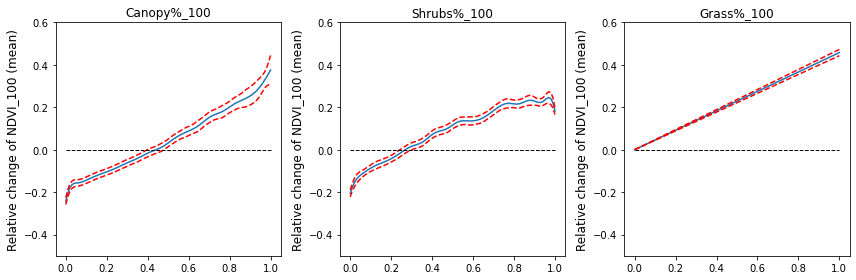

In [85]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Canopy%_100', 'Shrubs%_100', 'Grass%_100']
for i, ax in enumerate(axs):
    XX = ndvi_100_5.generate_X_grid(term=i)
    ax.plot(XX[:, i], ndvi_100_5.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], ndvi_100_5.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.6)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Relative change of NDVI_100 (mean)', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/eda/gam_ndvi_100_best_plot.png', dpi=300, bbox_inches='tight')
im.open('thesis_project/visualizations/eda/gam_ndvi_100_best_plot.png').save('thesis_project/visualizations/eda/gam_ndvi_100_best_plot.bmp')

plt.show()

- **Hyperparameters best GAM NDVI_100 model optimizing for Generalized Cross Validation (GCV) score**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)
    - **Regularization penalty**: lambda = [0.1, 0.001, 0.1]
    - **Smoothness**: n_splines = [20, 20, 1]

## 7. Modelling NDVI_300

In [52]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_300_df.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,Grass%_300,Shrubs%_300,geometry
0,0.488255,0.955836,2.242873e-16,0.062290,0.421350,POINT (396607.971 420663.294)
1,0.531893,0.496460,2.145669e-01,0.128283,0.198172,POINT (357230.295 401556.298)
2,0.812246,0.932001,4.007312e-01,0.247811,0.353859,POINT (390380.102 385914.240)
3,0.949025,0.989765,4.611924e-02,0.185859,0.605270,POINT (374281.691 415010.143)
4,0.562222,0.574693,3.180540e-01,0.167677,0.148158,POINT (389574.066 388155.085)


In [53]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Canopy%_300', 'Shrubs%_300', 'Grass%_300']
df = pd.DataFrame(gdf_300, columns=cols)

# target as NDVI_300
target = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# define X and Y
#X = df
y = target['NDVI_300']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 7.1. Model 1: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [54]:
# Model 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_1 = LinearGAM(l(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_1.gridsearch(X_train, y_train, lam=lams)
ndvi_300_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                         4.0
Link Function:                     IdentityLink Log Likelihood:                               -292054.8095
Number of Samples:                         4688 AIC:                                            584119.619
                                                AICc:                                          584119.6318
                                                GCV:                                                0.0076
                                                Scale:                                              0.0075
                                                Pseudo R-Squared:                                   0.7165
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2141360453.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_1.summary()


### 7.2. Model 2: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [55]:
# Model 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_2 = LinearGAM(s(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_2.gridsearch(X_train, y_train, lam=lams)
ndvi_300_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.8241
Link Function:                     IdentityLink Log Likelihood:                               -346370.3993
Number of Samples:                         4688 AIC:                                           692784.4468
                                                AICc:                                          692784.6603
                                                GCV:                                                0.0064
                                                Scale:                                              0.0064
                                                Pseudo R-Squared:                                   0.7609
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/138880699.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_2.summary()


### 7.3. Model 3: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [56]:
# Model 3
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_3 = LinearGAM(l(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_3.gridsearch(X_train, y_train, lam=lams)
ndvi_300_3.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.3487
Link Function:                     IdentityLink Log Likelihood:                               -377942.6205
Number of Samples:                         4688 AIC:                                           755913.9386
                                                AICc:                                          755914.0328
                                                GCV:                                                0.0059
                                                Scale:                                              0.0059
                                                Pseudo R-Squared:                                   0.7794
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2763482722.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_3.summary()


### 7.4. Model 4: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [57]:
# Model 4
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_4.gridsearch(X_train, y_train, lam=lams)
ndvi_300_4.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     16.6675
Link Function:                     IdentityLink Log Likelihood:                                -340562.298
Number of Samples:                         4688 AIC:                                            681159.931
                                                AICc:                                          681160.0722
                                                GCV:                                                0.0065
                                                Scale:                                              0.0065
                                                Pseudo R-Squared:                                   0.7566
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/3450665515.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_4.summary()


### 7.5. Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [58]:
# Model 5
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_5 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_5.gridsearch(X_train, y_train, lam=lams)
ndvi_300_5.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.1525
Link Function:                     IdentityLink Log Likelihood:                               -398978.5772
Number of Samples:                         4688 AIC:                                           798019.4595
                                                AICc:                                          798019.8897
                                                GCV:                                                0.0056
                                                Scale:                                              0.0056
                                                Pseudo R-Squared:                                   0.7921
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/1916949231.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_5.summary()


### 7.6. Model 6: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [59]:
# Model 6
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_6 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_6.gridsearch(X_train, y_train, lam=lams)
ndvi_300_6.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.8948
Link Function:                     IdentityLink Log Likelihood:                               -373269.9171
Number of Samples:                         4688 AIC:                                           746599.6237
                                                AICc:                                          746600.0203
                                                GCV:                                                 0.006
                                                Scale:                                              0.0059
                                                Pseudo R-Squared:                                   0.7782
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2187392072.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_6.summary()


### 7.7. Model 7: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [60]:
# Model 7
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_7 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_7.gridsearch(X_train, y_train, lam=lams)
ndvi_300_7.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     21.3259
Link Function:                     IdentityLink Log Likelihood:                               -388493.6942
Number of Samples:                         4688 AIC:                                           777032.0403
                                                AICc:                                          777032.2636
                                                GCV:                                                0.0058
                                                Scale:                                              0.0057
                                                Pseudo R-Squared:                                   0.7859
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2141254406.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_7.summary()


### 7.8. Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [61]:
# Model 8
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_8 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_8.gridsearch(X_train, y_train, lam=lams)
ndvi_300_8.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:11 Time:  0:00:11


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     38.1212
Link Function:                     IdentityLink Log Likelihood:                               -410206.2272
Number of Samples:                         4688 AIC:                                           820490.6967
                                                AICc:                                          820491.3721
                                                GCV:                                                0.0055
                                                Scale:                                              0.0054
                                                Pseudo R-Squared:                                   0.7983
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/547711982.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_8.summary()


### 7.9. (BEST MODEL) Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

<Figure size 432x288 with 0 Axes>

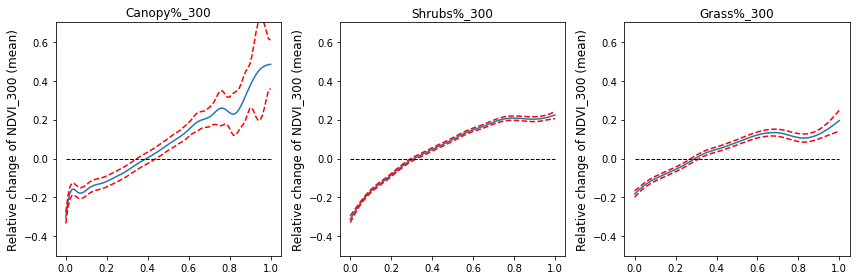

In [84]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Canopy%_300', 'Shrubs%_300', 'Grass%_300']
for i, ax in enumerate(axs):
    XX = ndvi_300_8.generate_X_grid(term=i)
    ax.plot(XX[:, i], ndvi_300_8.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], ndvi_300_8.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.7)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Relative change of NDVI_300 (mean)', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/eda/gam_ndvi_300_best_plot.png', dpi=300, bbox_inches='tight')
im.open('thesis_project/visualizations/eda/gam_ndvi_300_best_plot.png').save('thesis_project/visualizations/eda/gam_ndvi_300_best_plot.bmp')

plt.show()

- **Hyperparameters best GAM NDVI_300 model optimizing for Generalized Cross Validation (GCV) score**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)
    - **Regularization penalty**: lambda = [0.001, 10, 10]
    - **Smoothness**: n_splines = 20


## 8. Modelling NDVI_500

In [67]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_500_df.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,Grass%_500,Shrubs%_500,geometry
0,0.616906,0.714233,0.509538,0.305474,0.177276,POINT (377098.736 391409.893)
1,0.535196,0.518279,0.272543,0.170375,0.244285,POINT (388776.738 395338.550)
2,0.625744,0.665035,0.458237,0.265076,0.194620,POINT (385102.497 389586.914)
3,0.869751,0.959438,0.194798,0.637881,0.401261,POINT (358860.328 409008.505)
4,0.855770,0.984456,0.180780,0.170082,0.213244,POINT (369877.609 414278.479)


In [68]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Canopy%_500', 'Shrubs%_500', 'Grass%_500']
df = pd.DataFrame(gdf_500, columns=cols)

# target as NDVI_500
target = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# define X and Y
#X = df
y = target['NDVI_500']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 8.1. Model 1: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [69]:
# Model 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_1 = LinearGAM(l(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_1.gridsearch(X_train, y_train, lam=lams)
ndvi_500_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.9999
Link Function:                     IdentityLink Log Likelihood:                               -126566.7507
Number of Samples:                         2318 AIC:                                           253143.5013
                                                AICc:                                          253143.5273
                                                GCV:                                                0.0086
                                                Scale:                                              0.0085
                                                Pseudo R-Squared:                                   0.7147
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/1220089107.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_1.summary()


### 8.2. Model 2: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [70]:
# Model 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_2 = LinearGAM(s(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_2.gridsearch(X_train, y_train, lam=lams)
ndvi_500_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.8747
Link Function:                     IdentityLink Log Likelihood:                               -139074.2024
Number of Samples:                         2318 AIC:                                           278192.1543
                                                AICc:                                          278192.5903
                                                GCV:                                                0.0079
                                                Scale:                                              0.0077
                                                Pseudo R-Squared:                                    0.743
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/2940222901.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_2.summary()


### 8.3. Model 3: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [71]:
# Model 3
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_3 = LinearGAM(l(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_3.gridsearch(X_train, y_train, lam=lams)
ndvi_500_3.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.9156
Link Function:                     IdentityLink Log Likelihood:                               -169990.4831
Number of Samples:                         2318 AIC:                                           340006.7973
                                                AICc:                                          340006.9533
                                                GCV:                                                0.0065
                                                Scale:                                              0.0064
                                                Pseudo R-Squared:                                   0.7862
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/3773330009.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_3.summary()


### 8.4. Model 4: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [72]:
# Model 4
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_4.gridsearch(X_train, y_train, lam=lams)
ndvi_500_4.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.0567
Link Function:                     IdentityLink Log Likelihood:                               -145771.2487
Number of Samples:                         2318 AIC:                                           291566.6108
                                                AICc:                                          291566.7474
                                                GCV:                                                0.0075
                                                Scale:                                              0.0074
                                                Pseudo R-Squared:                                   0.7522
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/755273682.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_4.summary()


### 8.5. Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [73]:
# Model 5
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_5 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_5.gridsearch(X_train, y_train, lam=lams)
ndvi_500_5.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.7634
Link Function:                     IdentityLink Log Likelihood:                               -176982.6996
Number of Samples:                         2318 AIC:                                           354024.9261
                                                AICc:                                          354025.7268
                                                GCV:                                                0.0063
                                                Scale:                                              0.0061
                                                Pseudo R-Squared:                                   0.7974
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/3854426641.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_5.summary()


### 8.6. Model 6: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [74]:
# Model 6
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_6 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_6.gridsearch(X_train, y_train, lam=lams)
ndvi_500_6.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     35.0841
Link Function:                     IdentityLink Log Likelihood:                               -152789.9146
Number of Samples:                         2318 AIC:                                           305651.9973
                                                AICc:                                          305653.1707
                                                GCV:                                                0.0072
                                                Scale:                                               0.007
                                                Pseudo R-Squared:                                    0.768
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/1996838194.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_6.summary()


### 8.7. Model 7: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [75]:
# Model 7
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_7 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_7.gridsearch(X_train, y_train, lam=lams)
ndvi_500_7.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     18.8769
Link Function:                     IdentityLink Log Likelihood:                               -176018.8316
Number of Samples:                         2318 AIC:                                           352077.4169
                                                AICc:                                          352077.7782
                                                GCV:                                                0.0063
                                                Scale:                                              0.0062
                                                Pseudo R-Squared:                                   0.7945
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/3717736121.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_7.summary()


### 8.8. Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [76]:
# Model 8
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_8 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_8.gridsearch(X_train, y_train, lam=lams)
ndvi_500_8.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       30.37
Link Function:                     IdentityLink Log Likelihood:                               -182891.8423
Number of Samples:                         2318 AIC:                                           365846.4248
                                                AICc:                                          365847.3133
                                                GCV:                                                0.0061
                                                Scale:                                              0.0059
                                                Pseudo R-Squared:                                   0.8039
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_74951/1642183498.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_8.summary()


### 8.9. (BEST MODEL) Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

<Figure size 432x288 with 0 Axes>

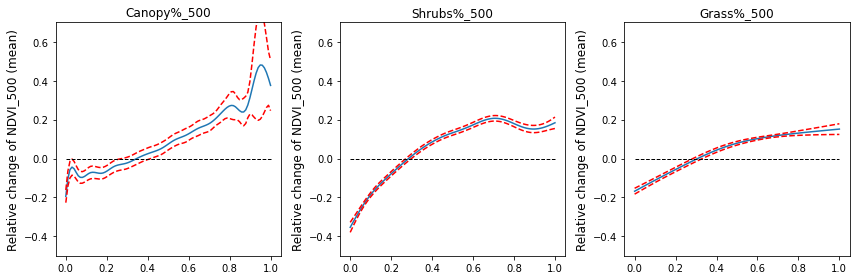

In [83]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Canopy%_500', 'Shrubs%_500', 'Grass%_500']
for i, ax in enumerate(axs):
    XX = ndvi_500_8.generate_X_grid(term=i)
    ax.plot(XX[:, i], ndvi_500_8.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], ndvi_500_8.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.7)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Relative change of NDVI_500 (mean)', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/eda/gam_ndvi_500_best_plot.png', dpi=300, bbox_inches='tight')
im.open('thesis_project/visualizations/eda/gam_ndvi_500_best_plot.png').save('thesis_project/visualizations/eda/gam_ndvi_500_best_plot.bmp')

plt.show()

- **Hyperparameters best GAM NDVI_500 model optimizing for Generalized Cross Validation (GCV) score**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)
    - **Regularization penalty**: lambda = [0.001, 10, 1000]
    - **Smoothness**: n_splines = 20